In [41]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')
HTML('<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
%matplotlib inline
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

import time
timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
print timestamp

root_dir = './'

src_dir = os.path.join(root_dir, 'code')
# add the 'code' directory as one where we can import modules
# prepend it to the path so that it can mask mosubdules with the same name, i.e. eden
sys.path = [src_dir] + sys.path

out_data_dir = os.path.join(root_dir, timestamp)
if not os.path.exists(out_data_dir): os.mkdir(out_data_dir)

# configure logger
from eden.util import configure_logging
import logging
logger = logging.getLogger()
log_fname = os.path.join(out_data_dir, 'log.txt')
configure_logging(logger, verbosity=1, filename=log_fname)

2016_11_23_18_57_37


In [43]:
import requests

def save(text, full_out_file_name):
    with open(full_out_file_name, 'w') as f:
        for line in text:
            f.write("%s\n" % line.encode('utf8').strip())

def rfam_uri(family_id, out_data_dir):
    # retrieve the seed sequences from RFAM and save them to file
    uri = 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id) 
    rfam_dir = os.path.join(out_data_dir, 'RNA')
    fname = family_id + '.fa'
    if not os.path.exists(rfam_dir):
        os.mkdir(rfam_dir)
    full_out_file_name = os.path.join(rfam_dir, fname)
    if not os.path.isfile(full_out_file_name):
        text = requests.get(uri).text.split('\n')
        save(text, full_out_file_name)
    return full_out_file_name

rfam_id = 'RF00005' #tRNA
data = rfam_uri(rfam_id, out_data_dir)

from eden.converter.fasta import fasta_to_sequence
seqs = list(fasta_to_sequence(data))

header, seq = seqs[3]
print header
print seq

Starting new HTTP connection (1): rfam.xfam.org
AB013373.1/3754-3825
GCGGAAGUAGUUCAGUGGUAGAACACCACCUUGCCAAGGUGGGGGUCGCGGGUUCGAAUCCCGUCUUCCGCU


In [44]:
from RaSE import StructuralStabilityEstimator
rase = StructuralStabilityEstimator(alphabet='ACGU',
                                    k=6,
                                    complexity=3, 
                                    nbits=15,
                                    window_size=150,
                                    max_bp_span=150,
                                    avg_bp_prob_cutoff=0.1,
                                    hard_threshold=0.51,
                                    max_num_edges=2,
                                    no_lonely_bps=True,
                                    nesting=True)

In [45]:
for line in rase.transform(seq):
    print(line)

             (((((((..((((.......)))).(((((((...))))))).....(((((.......)))))))))))).
  0 G A 0.93 .((((((..((((.......)))).(((((((...))))))).....(((((.......))))))))))).. 
  1 C A 0.16 ..(((((..((((.......)))).(((((((...))))))).....(((((.......))))))))))... *
  2 G C 0.13 .........((...(((((.....)))))...))...((((((((..(((((.......))))))))))))) *
  3 G A 0.17 .........((...(((((.....)))))...))...((((((((..(((((.......))))))))))))) *
  4 A U 0.20 ((((.((..((((.......)))).(((((((...))))))).....(((((.......))))))).)))). *
  5 A U 0.69 (((((.(..((((.......)))).(((((((...))))))).....(((((.......)))))).))))). 
  6 G C 0.61 ((((((...((((.......)))).(((((((...))))))).....(((((.......))))).)))))). 
  7 U A 0.56 ((((((((.((((.......)))).(((((((...)))))))......((((.......)))))))))))). 
  8 A G 0.48 (((((((..((((.......)))).(((((((...))))))).....(((((.......)))))))))))). 
  9 G A 0.60 (((((((.............((...(((((((...)))))))...))(((((.......)))))))))))). 
 10 U A 0.56 (((((((.............((...((

In [46]:
print rase.snips

AACAUUCAGAACACCGUCAGAUUGCGGCAGCCCAUCCUAGCCCUUGGCAUCUCGUCGCCGAUAAACCAGAAA


In [47]:
print rase.scores

[0.93093825349380632, 0.16007368785792586, 0.12587047775216362, 0.16563260936176288, 0.19777182531094661, 0.69438006209202974, 0.61465634658769985, 0.56434716853894862, 0.48023649626278875, 0.59646978045455645, 0.56251904992356039, 0.70756199786724971, 0.59705059075662459, 0.36060245945100411, 0.59852524996410883, 0.52592727486131996, 0.81837177111204495, 0.68646553616782713, 0.79279780286611767, 0.54764501586773606, 0.54587510230267977, 0.61901652077178693, 0.70396630327499299, 0.55784222645074877, 0.67528593473141962, 0.46929419915368259, 0.53034383219079873, 0.63233957676399766, 0.5581801555840068, 0.47393431030577055, 0.57737066803318204, 0.55492905405814841, 0.59531094214761882, 0.95435419542673205, 0.94492131245165789, 0.55678698407639993, 0.56647870256925803, 0.56685518983911953, 0.3544342737338898, 0.55004895609583337, 0.3896080439165025, 0.36082555180440201, 0.58745032793720187, 0.71191003468912173, 0.72054759702555038, 0.44364766517230414, 0.56869168832132955, 0.6124913278966

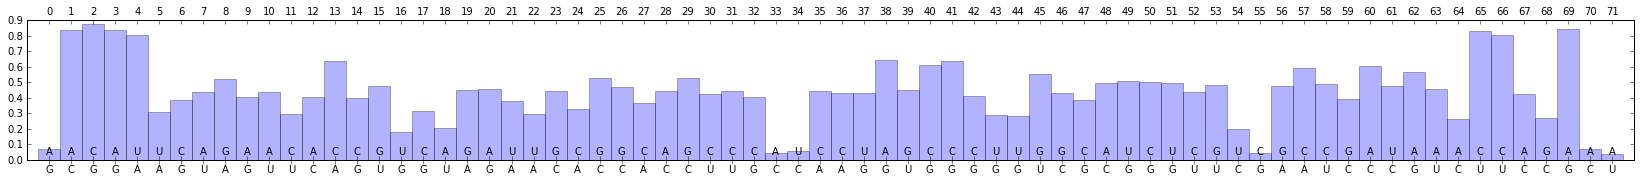

In [48]:
rase.plot()

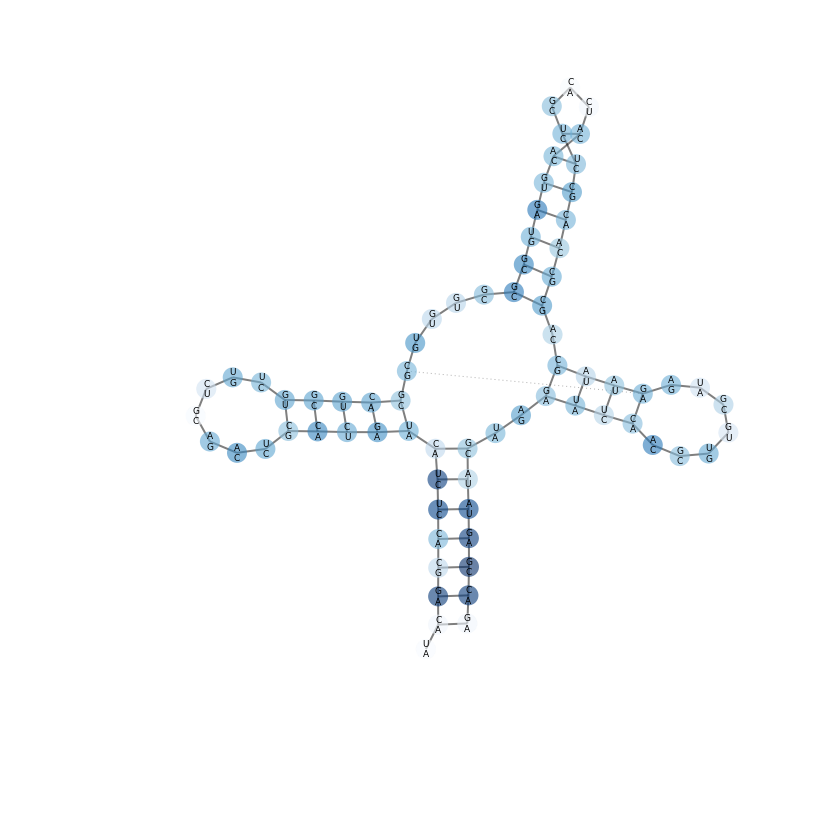

In [49]:
rase.draw()

In [58]:
rase.draw_all(file_name='a.png')

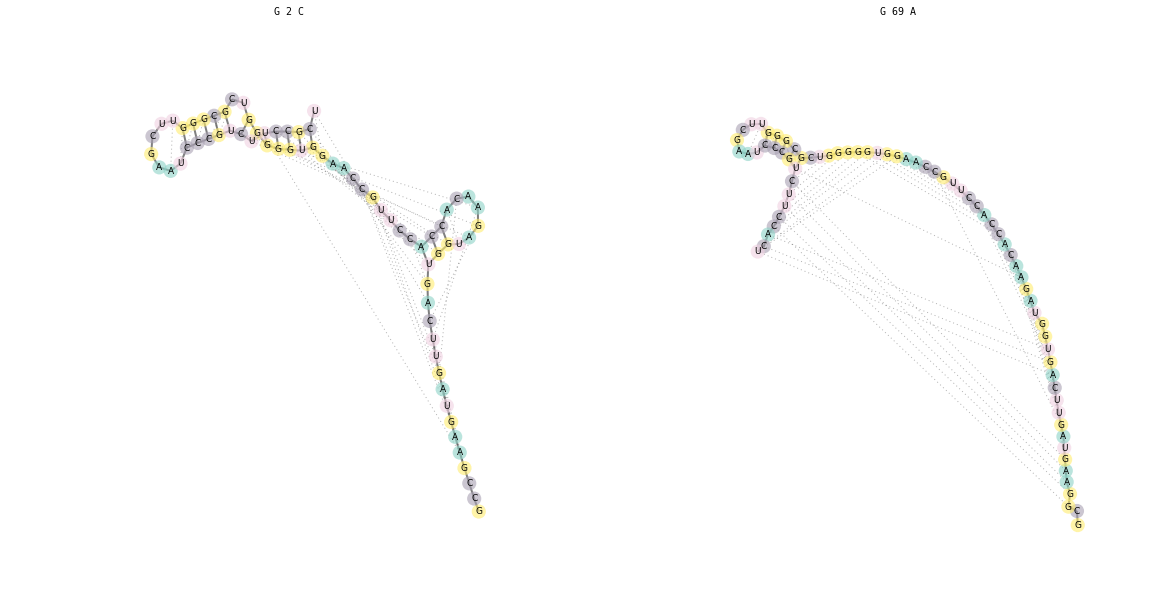

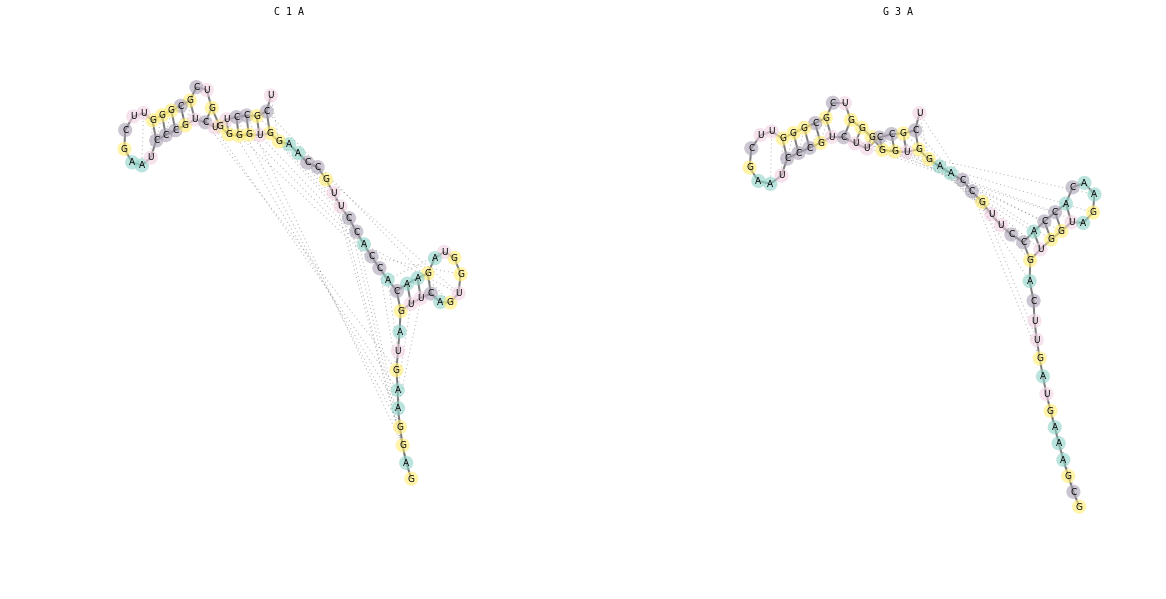

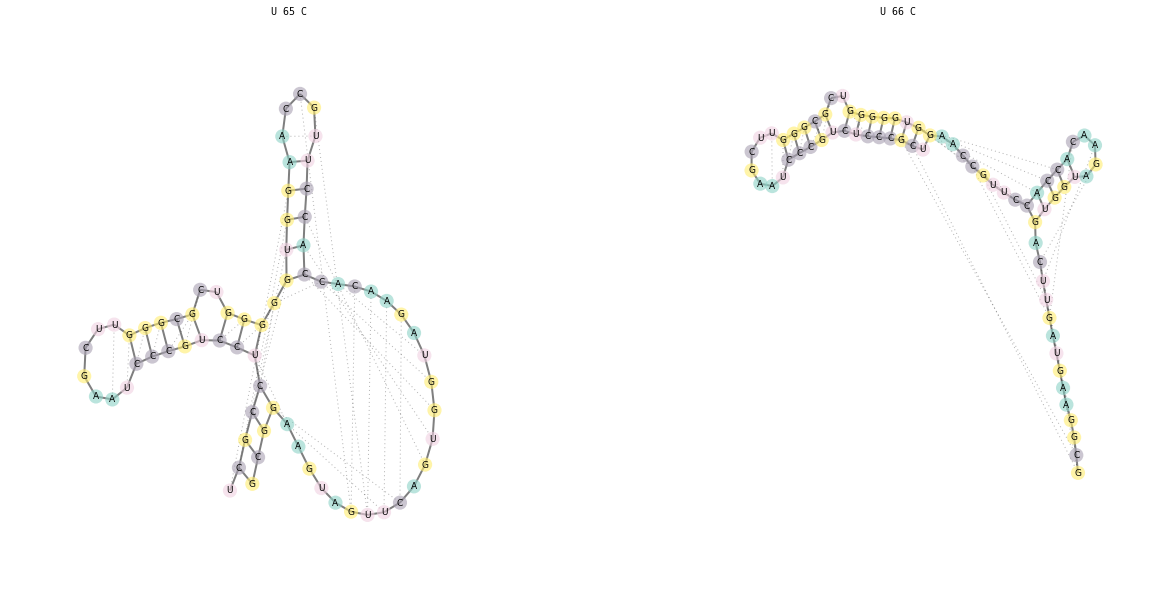

In [55]:
rase.draw_all(file_name='a.png')

---